In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Import mpatches for custom legends
import seaborn as sns
from scipy import stats
import datetime as datetime
import folium


capital_bike_full_dtset = pd.read_csv('CBS_2021-2023_Full.csv')
#capital_bike_daily_weather = pd.read_csv('CBS_2021-2023_Daily_Weather.csv')


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_62895/634024886.py:11: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  capital_bike_full_dtset = pd.read_csv('CBS_2021-2023_Full.csv')


In [4]:
capital_bike_full_dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [5]:
capital_bike_full_dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [6]:
capital_bike_full_dtset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [7]:
capital_bike_full_dtset.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual
10693996,095E4B13F44E3643,electric_bike,2023-12-31 23:59:38,2024-01-01 00:10:44,4th & Florida Ave NE,31532.0,NaN,NaN,38.907130,-77.000966,38.920000,-77.000000,member


In [8]:
capital_bike_full_dtset.reset_index(drop=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [9]:
capital_bike_full_dtset.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [10]:
capital_bike_full_dtset.describe().T

,count,mean,std,min,25%,50%,75%,max
start_lat,10693995.0,38.903306,0.026842,38.76,38.890539,38.902760,38.914751,39.14
start_lng,10693995.0,-77.031872,0.033462,-77.40,-77.044609,-77.031617,-77.013667,-76.82
end_lat,10677232.0,38.902256,0.050493,0.00,38.890496,38.902314,38.912648,39.19
end_lng,10677232.0,-77.031463,0.091278,-77.56,-77.044661,-77.031500,-77.012808,0.00


In [11]:
capital_bike_full_dtset.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [12]:
# Drop all rows with any NaN values
capital_bike_full_dtset = capital_bike_full_dtset.dropna()

# Verify the result
print(capital_bike_full_dtset.isnull().sum())


ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [13]:
#capital_bike_full_dtset['start_lat'].fillna(capital_bike_full_dtset['start_lat'].mean(), inplace=True)

In [14]:
#capital_bike_full_dtset['start_lng'].fillna(capital_bike_full_dtset['start_lng'].mean(), inplace=True)

In [15]:
#capital_bike_full_dtset['end_lat'].fillna(capital_bike_full_dtset['end_lat'].mean(), inplace=True)

In [16]:
#capital_bike_full_dtset['end_lng'].fillna(capital_bike_full_dtset['end_lng'].mean(), inplace=True)

In [17]:
#Checking for duplicates
capital_bike_full_dtset.duplicated().sum()

np.int64(0)

In [18]:
#Check for objects or strings in the data if there are any
object_col = capital_bike_full_dtset.select_dtypes(include="object").columns
capital_bike_full_dtset[object_col].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,member
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,member
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,casual


In [19]:
import pandas as pd

# Ensure 'started_at' and 'ended_at' are in datetime format
capital_bike_full_dtset['started_at'] = pd.to_datetime(capital_bike_full_dtset['started_at'])
capital_bike_full_dtset['ended_at'] = pd.to_datetime(capital_bike_full_dtset['ended_at'])

# Calculate the riding time
capital_bike_full_dtset['riding_time'] = (capital_bike_full_dtset['ended_at'] - capital_bike_full_dtset['started_at']).dt.total_seconds() / 60  # Convert to minutes

# Display the updated DataFrame
print(capital_bike_full_dtset[['ride_id', 'started_at', 'ended_at', 'riding_time']].head())


            ride_id          started_at            ended_at  riding_time
0  5CB9DFCECF79AF84 2021-01-01 00:08:33 2021-01-01 00:33:53    25.333333
2  E74069873161EE33 2021-01-01 00:14:32 2021-01-01 00:28:45    14.216667
3  91F95E512CABC46A 2021-01-01 00:15:45 2021-01-01 00:21:20     5.583333
4  DA46A05139C0EA2F 2021-01-01 00:17:46 2021-01-01 00:21:00     3.233333
6  0535306B61EF92F9 2021-01-01 00:19:06 2021-01-01 00:36:28    17.366667


In [20]:
# Check the shape of the data set
print(capital_bike_full_dtset.shape)

(9572692, 14)


In [21]:
capital_bike_full_dtset.isna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10693992,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10693993,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10693994,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
capital_bike_full_dtset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667


In [23]:
#all_data = pd.concat([capital_bike_full_dtset.describe(), capital_bike_daily_weather.describe()], axis=1, keys=["Full Data Stats", "Daily Data Stats"])
#all_data.head()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_62895/2709606321.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_riding_time, x='member_casual', y='riding_time', palette='coolwarm')


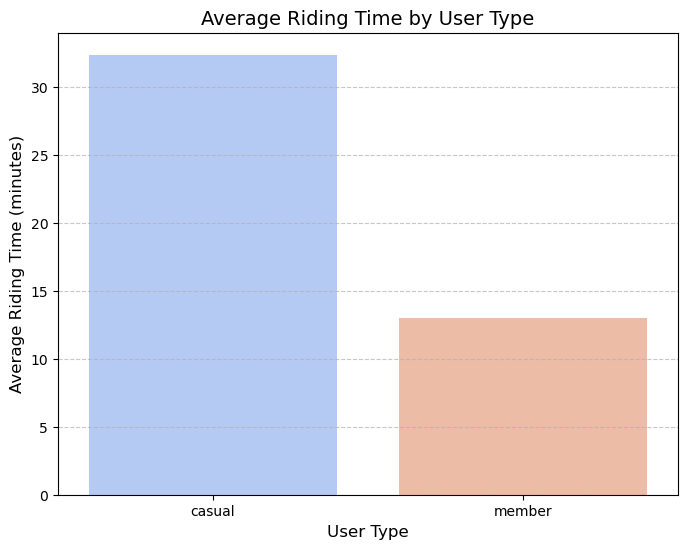

In [24]:
# Ensure riding_time column exists and is numeric
capital_bike_full_dtset['riding_time'] = pd.to_numeric(capital_bike_full_dtset['riding_time'], errors='coerce')

# Step 1: Group by 'member_casual' and calculate average riding time
average_riding_time = capital_bike_full_dtset.groupby('member_casual')['riding_time'].mean().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=average_riding_time, x='member_casual', y='riding_time', palette='coolwarm')

# Add labels and title
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Average Riding Time (minutes)', fontsize=12)
plt.title('Average Riding Time by User Type', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_62895/1073093869.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_riding_time, x='rideable_type', y='riding_time', palette='coolwarm')


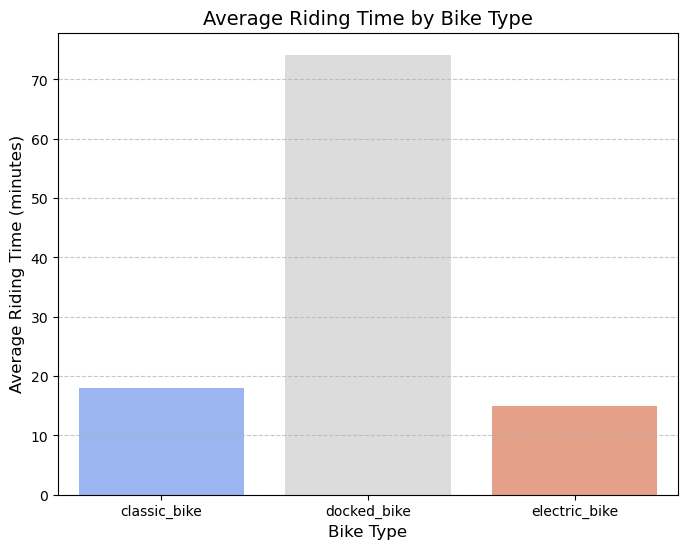

In [25]:
# Ensure riding_time column exists and is numeric
capital_bike_full_dtset['riding_time'] = pd.to_numeric(capital_bike_full_dtset['riding_time'], errors='coerce')

# Group by 'member_casual' and calculate average riding time
average_riding_time = capital_bike_full_dtset.groupby('rideable_type')['riding_time'].mean().reset_index()

# 2: Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=average_riding_time, x='rideable_type', y='riding_time', palette='coolwarm')

# Add labels and title
plt.xlabel('Bike Type', fontsize=12)
plt.ylabel('Average Riding Time (minutes)', fontsize=12)
plt.title('Average Riding Time by Bike Type', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

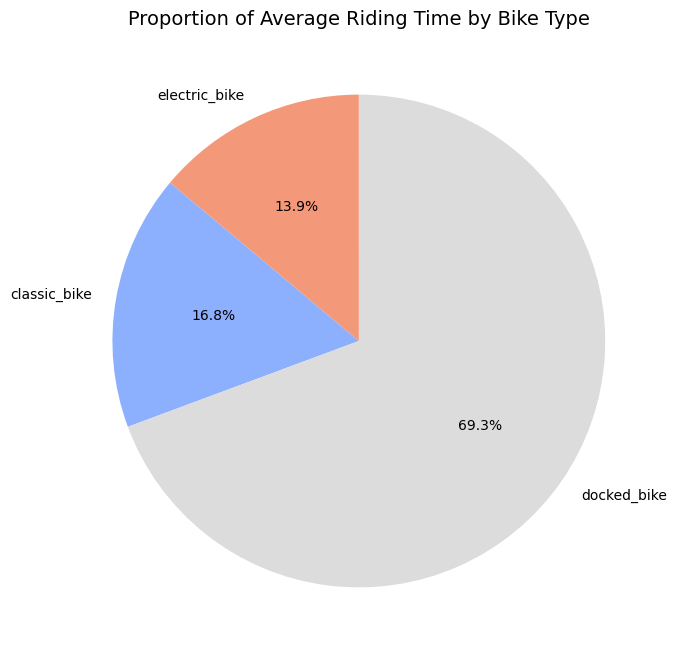

In [26]:
average_riding_time = (
    capital_bike_full_dtset.groupby('rideable_type')['riding_time']
    .mean()
    .reset_index()
)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    average_riding_time['riding_time'],
    labels=average_riding_time['rideable_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(average_riding_time))
)

# Add title
plt.title('Proportion of Average Riding Time by Bike Type', fontsize=14)

# Display the plot
plt.show()


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_62895/2698662507.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bike_type_counts, x='rideable_type', y='count', palette='viridis')


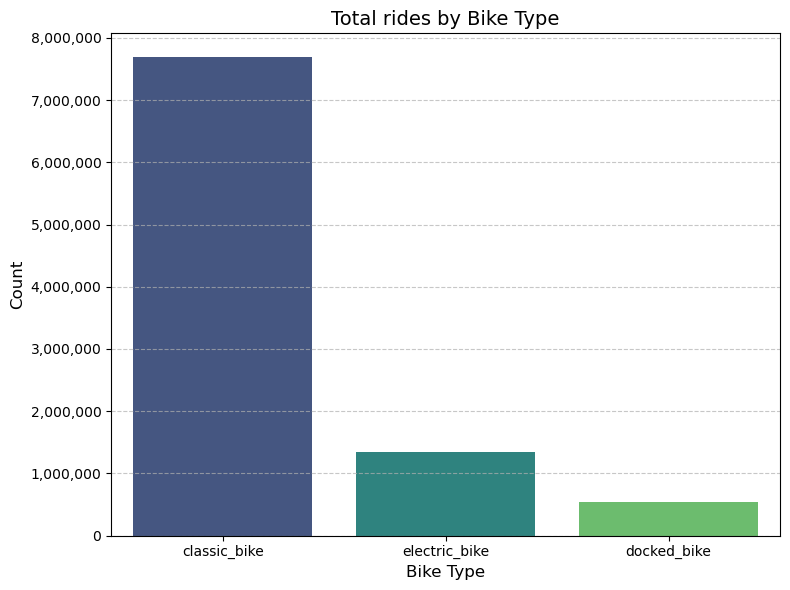

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Count the occurrences of each bike type
bike_type_counts = capital_bike_full_dtset['rideable_type'].value_counts().reset_index()
bike_type_counts.columns = ['rideable_type', 'count']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=bike_type_counts, x='rideable_type', y='count', palette='viridis')

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
plt.xlabel('Bike Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total rides by Bike Type', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


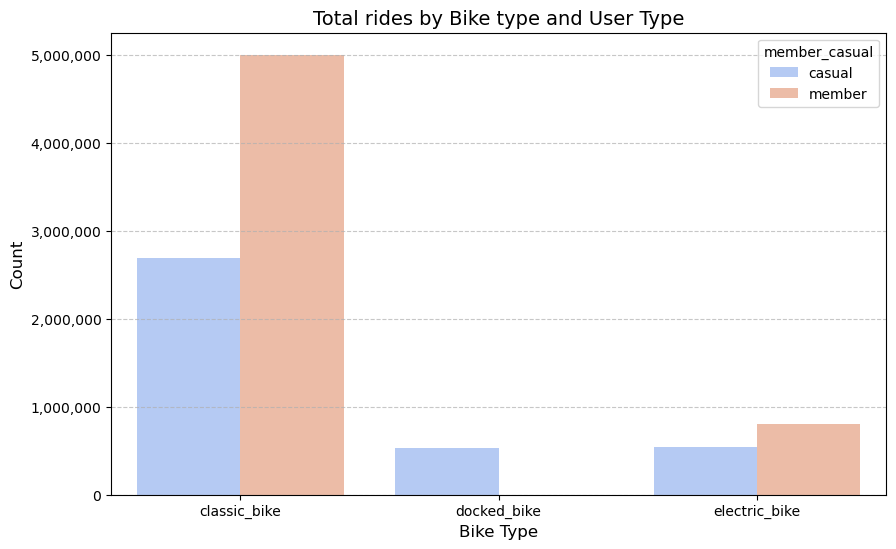

In [42]:
#Which Bike is being used by which user?
# Group by 'rideable_type' and 'member_casual' and count occurrences
bike_user_counts = (
    capital_bike_full_dtset.groupby(['rideable_type', 'member_casual'])
    .size()
    .reset_index(name='count')
)

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bike_user_counts,
    x='rideable_type',
    y='count',
    hue='member_casual',
    palette='coolwarm'
)
# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add labels and title
plt.xlabel('Bike Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total rides by Bike type and User Type', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


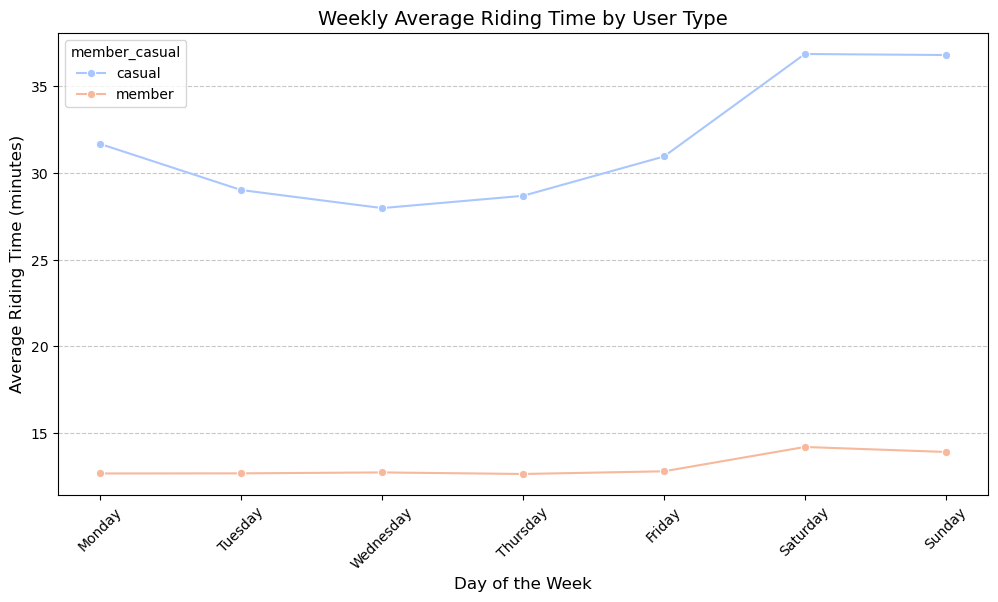

In [29]:
# Average Riding time per day?
# Ensure 'started_at' is in datetime format
capital_bike_full_dtset['started_at'] = pd.to_datetime(capital_bike_full_dtset['started_at'])

# Extract the weekday
capital_bike_full_dtset['Weekday'] = capital_bike_full_dtset['started_at'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Group by 'Weekday' and 'member_casual' and calculate the mean riding time
weekly_avg_riding_time = (
    capital_bike_full_dtset.groupby(['Weekday', 'member_casual'])['riding_time']
    .mean()
    .reset_index()
)

# Map weekdays to their names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg_riding_time['Weekday'] = weekly_avg_riding_time['Weekday'].apply(lambda x: days[x])

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_avg_riding_time,
    x='Weekday',
    y='riding_time',
    hue='member_casual',
    marker='o',
    palette='coolwarm'
)

# Adding labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Riding Time (minutes)', fontsize=12)
plt.title('Weekly Average Riding Time by User Type', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [30]:
# Mapping with Folium
# use coordinates to check the density of rides and why? Number of the station, demand of the bikes in the neighborhood, which neighborhood demands more bike and why? 
# Add markers (pin point), pop ups with explaination, where do people start biking and where do they leave the bike (Departure and Destination)

In [31]:
# Drop all rows with any NaN values
capital_bike_full_dtset = capital_bike_full_dtset.dropna()

# Verify the result
print(capital_bike_full_dtset.isnull().sum())


# Count the unique values in the 'start_station_name' column
unique_stations_count = capital_bike_full_dtset['start_station_name'].nunique()

print(f"Number of unique start stations: {unique_stations_count}")

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
riding_time           0
Weekday               0
dtype: int64
Number of unique start stations: 858


In [32]:
# Ensure the Date column is in datetime format
capital_bike_full_dtset['started_at'] = pd.to_datetime(capital_bike_full_dtset['started_at'])

# Extract the year from the Date column and create a new column 'Year'
capital_bike_full_dtset['Year'] = capital_bike_full_dtset['started_at'].dt.year

# Check the result
print(capital_bike_full_dtset[['started_at', 'Year']].head())

           started_at  Year
0 2021-01-01 00:08:33  2021
2 2021-01-01 00:14:32  2021
3 2021-01-01 00:15:45  2021
4 2021-01-01 00:17:46  2021
6 2021-01-01 00:19:06  2021


In [33]:
capital_bike_full_dtset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9572692 entries, 0 to 10693995
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  riding_time         float64       
 14  Weekday             int32         
 15  Year                int32         
dtypes: datetime64[ns](2), float64(5), int32(2), object(7)
memory usage: 1.1+ GB


/var/folders/2g/bg5f5wvx2qbf6w0cqh2z6jdm0000gn/T/ipykernel_62895/1510346374.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['2023'], y=[unique_stations_count], palette='viridis')


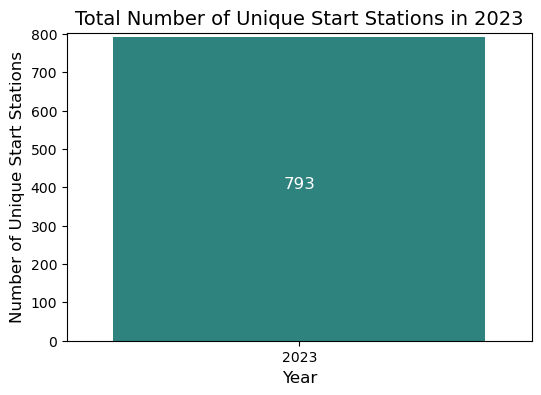

In [34]:
# Filter data for the year 2021
data_2021 = capital_bike_full_dtset[capital_bike_full_dtset['Year'] == 2023]

# Extract and count unique start stations
unique_stations_count = data_2021['start_station_name'].nunique()

# Visualize the count
plt.figure(figsize=(6, 4))
sns.barplot(x=['2023'], y=[unique_stations_count], palette='viridis')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Start Stations', fontsize=12)
plt.title('Total Number of Unique Start Stations in 2023', fontsize=14)
plt.ylim(0, unique_stations_count + 10)
plt.text(0, unique_stations_count / 2, str(unique_stations_count), ha='center', color='white', fontsize=12)

# Show the plot
plt.show()


In [35]:
has_nan = capital_bike_full_dtset.isnull().values.any()
print(f"Contains NaN values: {has_nan}")


Contains NaN values: False


In [ ]:
# Ensure 'started_at' is in datetime format and filter for the year 2022
capital_bike_full_dtset['started_at'] = pd.to_datetime(capital_bike_full_dtset['started_at'])
data_2022 = capital_bike_full_dtset[capital_bike_full_dtset['started_at'].dt.year == 2022]

# Extract unique start stations with their coordinates
unique_stations = data_2022[['start_station_name', 'start_lat', 'start_lng']].dropna().drop_duplicates()

# Initialize a Folium map (centered on the mean coordinates)
center_lat = unique_stations['start_lat'].mean()
center_lng = unique_stations['start_lng'].mean()
station_map = folium.Map(location=[center_lat, center_lng], zoom_start=12)

# Add markers for each unique station
for _, row in unique_stations.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=row['start_station_name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(station_map)

# Save and display the map
station_map.save('unique_stations_2022.html')

# Display the map in the notebook (if applicable)
station_map
